In [17]:
import pandas as pd

# Load the data from the uploaded files
population_file_path = 'Population.csv'
fire_file_path = 'Fire.csv'

# Read the files
population_df = pd.read_csv(population_file_path)
fire_df = pd.read_csv(fire_file_path)

# Process population data
population_df = population_df[['Neighborhood', '2020_Total_Population']]
population_df.rename(columns={'2020_Total_Population': 'Population'}, inplace=True)

# Process fire data
fire_df['Neighborhood'] = fire_df['neighborhood'].astype(str)
fire_count = fire_df.groupby('Neighborhood').size().reset_index(name='Fire_Count')

# Merge datasets
combined_data = pd.merge(fire_count, population_df, on='Neighborhood', how='inner')

# Calculate incidents per 1,000 residents
combined_data['Incidents_Per_Thousand'] = (combined_data['Fire_Count'] / combined_data['Population']) * 1000

# Get the top 10 safest neighborhoods
safest_neighborhoods = combined_data.nsmallest(10, 'Incidents_Per_Thousand').reset_index(drop=True)

# Display results
print("Top 10 Safest Neighborhoods (Fire Incidents Per 1,000 Residents):")
print("=" * 60)
for rank, row in enumerate(safest_neighborhoods.itertuples(), start=1):
    print(f"Rank {rank}: {row.Neighborhood}")
    print(f"  Total Population: {row.Population}")
    print(f"  Total Fire Incidents: {row.Fire_Count}")
    print(f"  Fire Incidents Per 1,000 Residents: {row.Incidents_Per_Thousand:.2f}")
    print("-" * 60)



Top 10 Safest Neighborhoods (Fire Incidents Per 1,000 Residents):
Rank 1: Westwood
  Total Population: 3332
  Total Fire Incidents: 28
  Fire Incidents Per 1,000 Residents: 8.40
------------------------------------------------------------
Rank 2: Regent Square
  Total Population: 971
  Total Fire Incidents: 9
  Fire Incidents Per 1,000 Residents: 9.27
------------------------------------------------------------
Rank 3: Morningside
  Total Population: 3252
  Total Fire Incidents: 35
  Fire Incidents Per 1,000 Residents: 10.76
------------------------------------------------------------
Rank 4: Squirrel Hill North
  Total Population: 11879
  Total Fire Incidents: 136
  Fire Incidents Per 1,000 Residents: 11.45
------------------------------------------------------------
Rank 5: North Oakland
  Total Population: 10691
  Total Fire Incidents: 133
  Fire Incidents Per 1,000 Residents: 12.44
------------------------------------------------------------
Rank 6: Shadyside
  Total Population: 15

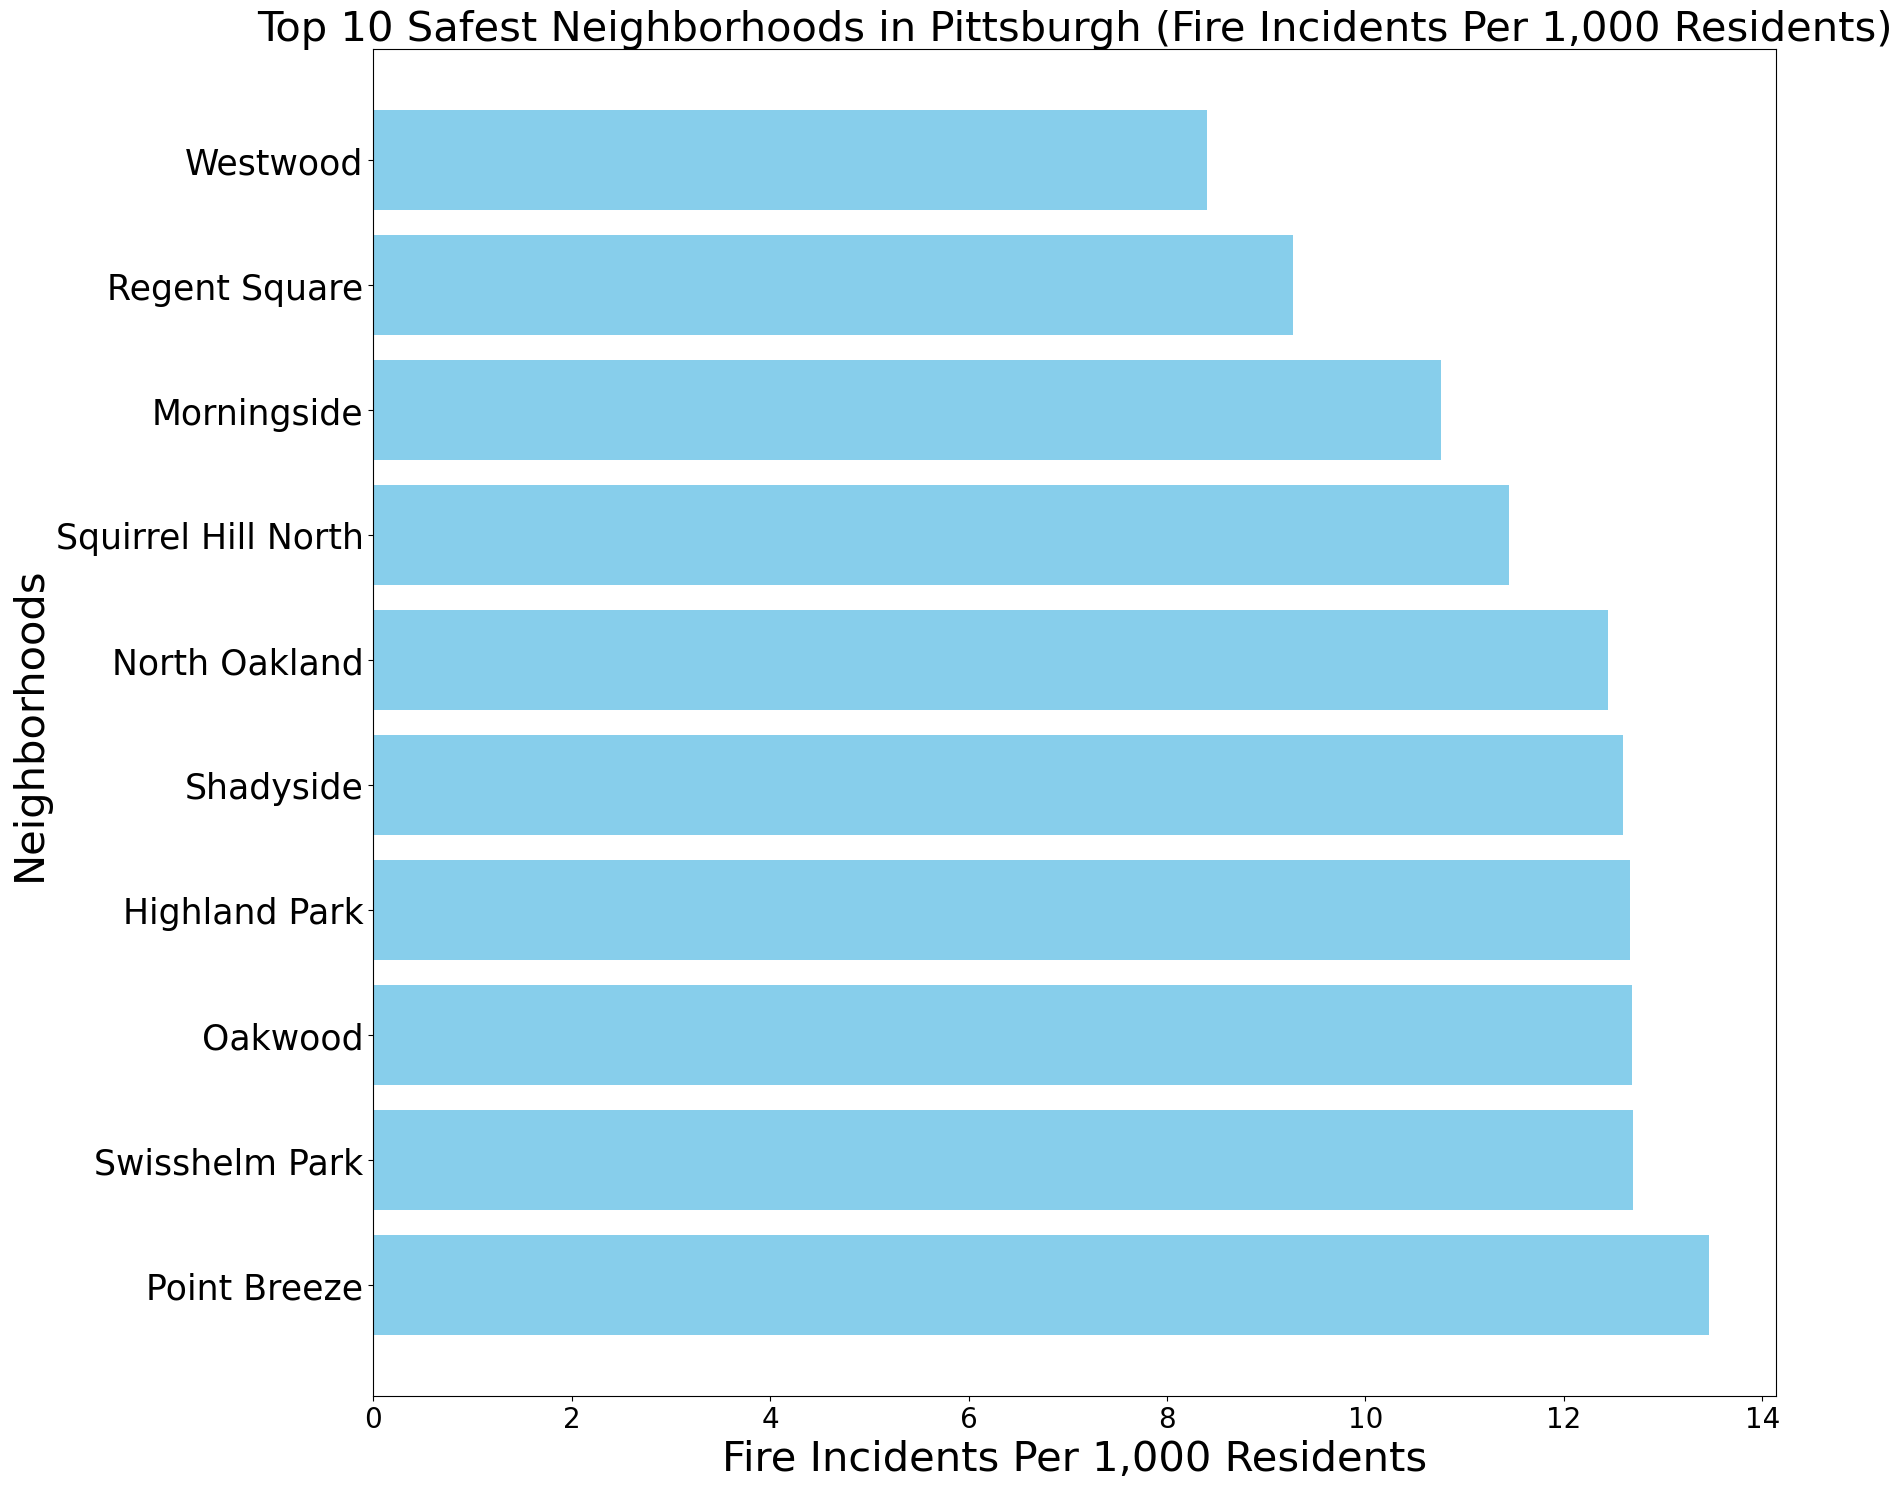

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
plt.barh(safest_neighborhoods['Neighborhood'], safest_neighborhoods['Incidents_Per_Thousand'], color='skyblue')

plt.title('Top 10 Safest Neighborhoods in Pittsburgh (Fire Incidents Per 1,000 Residents)', fontsize=30)
plt.xlabel('Fire Incidents Per 1,000 Residents', fontsize=30)
plt.ylabel('Neighborhoods', fontsize=30)

# Increase font size of both x-axis and y-axis tick labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)  # Adjusted for bigger city names

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



In [11]:
import pandas as pd

# Load the datasets
population_df = pd.read_csv('Population.csv')
incident_df = pd.read_csv('CITATIONS.csv')

# Extract and clean population data
population_df = population_df[['Neighborhood', '2020_Total_Population']]
population_df.rename(columns={'2020_Total_Population': 'Population'}, inplace=True)

# Process incident data
incident_df.rename(columns={'NEIGHBORHOOD': 'Neighborhood'}, inplace=True)
citation_count = incident_df.groupby('Neighborhood').size().reset_index(name='Citation_Count')

# Combine datasets based on neighborhoods
combined_data = pd.merge(citation_count, population_df, on='Neighborhood', how='inner')

# Calculate citations per 1,000 residents
combined_data['Citations_Per_Thousand'] = (combined_data['Citation_Count'] / combined_data['Population']) * 1000

# Get the top 10 neighborhoods with the lowest citations per 1,000 residents
safest_neighborhoods = combined_data.nsmallest(10, 'Citations_Per_Thousand').reset_index(drop=True)

# Print the results
print("Top 10 Safest Neighborhoods (Citations Per 1,000 Residents):")
print("=" * 60)
for rank, row in enumerate(safest_neighborhoods.itertuples(), start=1):
    print(f"Rank {rank}: {row.Neighborhood}")
    print(f"  Total Population: {row.Population}")
    print(f"  Total Citations: {row.Citation_Count}")
    print(f"  Citations Per 1,000 Residents: {row.Citations_Per_Thousand:.2f}")
    print("-" * 60)


Top 10 Safest Neighborhoods (Citations Per 1,000 Residents):
Rank 1: Swisshelm Park
  Total Population: 1339
  Total Citations: 6
  Citations Per 1,000 Residents: 4.48
------------------------------------------------------------
Rank 2: Chartiers City
  Total Population: 492
  Total Citations: 3
  Citations Per 1,000 Residents: 6.10
------------------------------------------------------------
Rank 3: Stanton Heights
  Total Population: 4427
  Total Citations: 28
  Citations Per 1,000 Residents: 6.32
------------------------------------------------------------
Rank 4: Summer Hill
  Total Population: 998
  Total Citations: 7
  Citations Per 1,000 Residents: 7.01
------------------------------------------------------------
Rank 5: Morningside
  Total Population: 3252
  Total Citations: 24
  Citations Per 1,000 Residents: 7.38
------------------------------------------------------------
Rank 6: Highland Park
  Total Population: 6235
  Total Citations: 51
  Citations Per 1,000 Residents: 8.

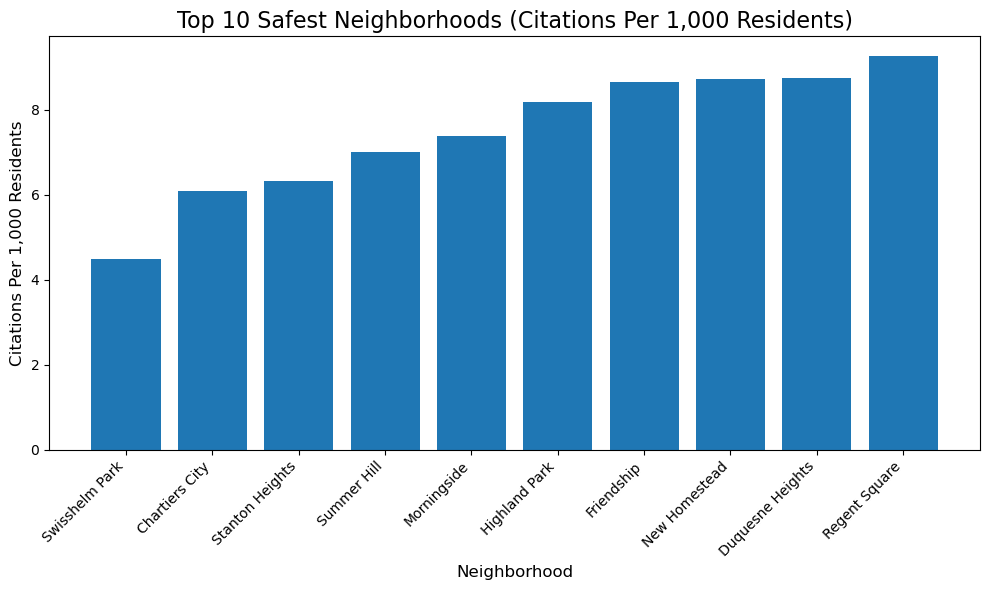

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


population_df = pd.read_csv('Population.csv')
citation_df = pd.read_csv('CITATIONS.csv')

population_df = population_df[['Neighborhood', '2020_Total_Population']]
population_df.rename(columns={'2020_Total_Population': 'Population'}, inplace=True)

citation_df.rename(columns={'NEIGHBORHOOD': 'Neighborhood'}, inplace=True)
citation_count = citation_df.groupby('Neighborhood').size().reset_index(name='Citation_Count')


combined_data = pd.merge(citation_count, population_df, on='Neighborhood', how='inner')

combined_data['Citations_Per_Thousand'] = (combined_data['Citation_Count'] / combined_data['Population']) * 1000

safest_neighborhoods = combined_data.nsmallest(10, 'Citations_Per_Thousand').reset_index(drop=True)


plt.figure(figsize=(10, 6))
plt.bar(safest_neighborhoods['Neighborhood'], safest_neighborhoods['Citations_Per_Thousand'])
plt.title('Top 10 Safest Neighborhoods (Citations Per 1,000 Residents)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Citations Per 1,000 Residents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()